# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'train.p'
testing_file = 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [2]:
### Replace each question mark with the appropriate value.

# Number of training examples
n_train = X_train.shape[0]

# Number of testing examples.
n_test = X_test.shape[0]

# What's the shape of an traffic sign image?
image_shape = (X_train.shape[1],X_train.shape[2])

# How many unique classes/labels there are in the dataset.
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

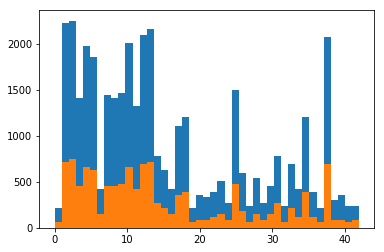

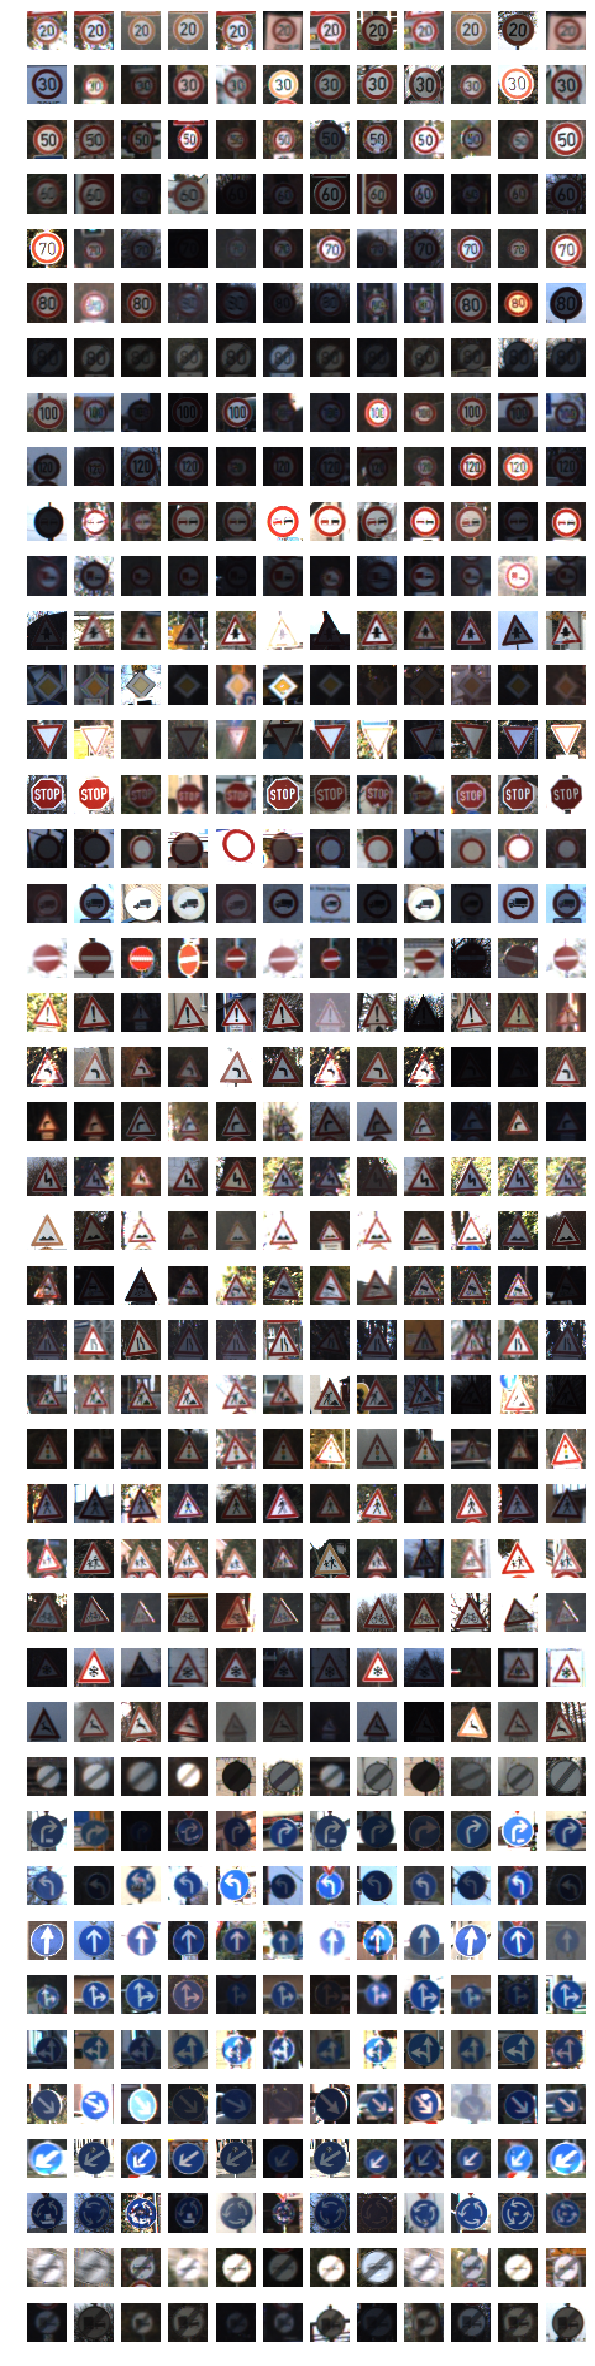

In [3]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

classes = list(set(y_train))
# classes_index will be dictionary: each class -> randomized set of indexes 
classes_index = {}
for i,x in enumerate(y_train):
    if x not in classes_index:
        classes_index[x]=[i]
    else:
        classes_index[x].append(i)
for c in classes:
    random.shuffle(classes_index[c])

# show classes histogram in training and sets
# we can see that the histogram between test and train is almost identical
# this is a good sign since it looks that they come from the same dataset
plt.hist(y_train, bins=n_classes)    
plt.hist(y_test,  bins=n_classes)    
plt.show()

#print a few examples of each class (each class is one row)
classes_per_row = 12
fig, axes = plt.subplots(n_classes, classes_per_row, figsize=(10,n_classes))
for i, ax in enumerate(axes.flat):
    ax.set_axis_off()
    ax.imshow(X_train[classes_index[int(i/classes_per_row)][i % classes_per_row]])
plt.show()



----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

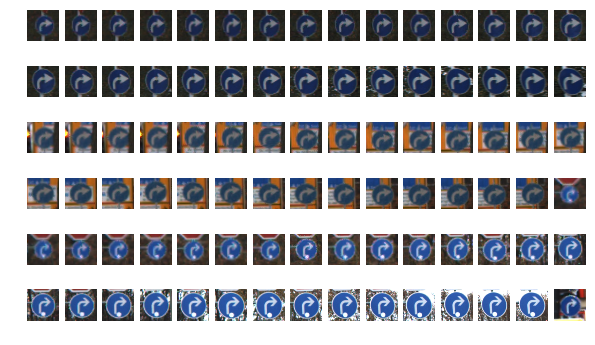

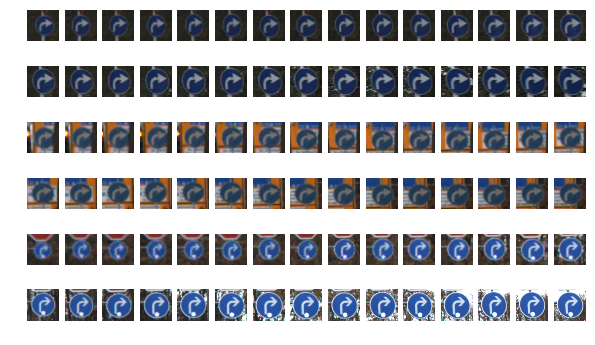

In [4]:
# the training dataset is composed of bursts of images from the same video 
# typically each video has 30 images and they are sequential in the set
# however the size of the training set 39209 is not divisible by 30
# there's one missing image at index 30*1122+29 (found by visual inspection)
# the code below just duplicates the previous one to make the training
# set bursts aligned each 30 images. This will become handy later

fig, axes = plt.subplots(6, 15, figsize=(10,6))

for i, ax in enumerate(axes.flat):
    ax.set_axis_off()
    ax.imshow(X_train[(30*1121)+i])
plt.show()

if (X_train.shape[0] == 39209):
    X_train = np.insert(X_train,30*1122+29, X_train[30*1122+28], axis=0)
    y_train = np.insert(y_train,30*1122+29, y_train[30*1122+28], axis=0)

fig, axes = plt.subplots(6, 15, figsize=(10,6))
for i, ax in enumerate(axes.flat):
    ax.set_axis_off()
    ax.imshow(X_train[(30*1121)+i])
plt.show()

In [18]:
### Preprocess the data here.
### Generate data additional data (OPTIONAL!)
### Feel free to use as many code cells as needed.
import cv2
#from skimage import exposure

def to_yuv(items):
    if len(items.shape)==4:
        yuv_item = np.empty_like(items)
        for item in range(items.shape[0]):
            yuv_item[item,:,:,:] = cv2.cvtColor(items[item,:,:,:], cv2.COLOR_RGB2YCrCb)
    else:
        yuv_item                 = cv2.cvtColor(items,             cv2.COLOR_RGB2YCrCb)
    return yuv_item

clahe = cv2.createCLAHE(clipLimit=1.5, tileGridSize=(3,3))
def equalize(items):
    if len(items.shape)==4:
        equalized_item = np.copy(items)
        for item in range(items.shape[0]):
#            equalized_item[item,:,:,0] = exposure.equalize_adapthist(items[item,:,:,0])
            equalized_item[item,:,:,0] = clahe.apply(items[item,:,:,0])
#            equalized_item[item,:,:,0] = cv2.equalizeHist(items[item,:,:,0])
    else:
        equalized_item        = np.copy(items)
#        equalized_item[:,:,0] = exposure.equalize_adapthist(items[:,:,0])

        equalized_item[:,:,0] = cv2.equalizeHist(clahe.apply(items[:,:,0]))
#        equalized_item[:,:,0] = cv2.equalizeHist(items[:,:,0])
    return equalized_item

def normalize(items):
    return equalize(to_yuv(items))

def rotate(items):
    cols,rows = image_shape
    if len(items.shape)==4:
        faked = np.empty_like(items)
        for item in range(items.shape[0]):
            M = cv2.getRotationMatrix2D((cols/2+random.randint(-2,2),rows/2+random.randint(-2,2)),random.uniform(-10,10),random.uniform(0.95,1.05))
            faked[item,:,:,:] = cv2.warpAffine(items[item,:,:,:],M,(cols,rows),flags=cv2.INTER_LANCZOS4+cv2.WARP_FILL_OUTLIERS,borderMode=cv2.BORDER_REPLICATE)
    else:
        colors = [0,1,2]
        M = cv2.getRotationMatrix2D((cols/2+random.randint(-2,2),rows/2+random.randint(-2,2)),random.uniform(-10,10),random.uniform(0.95,1.05))
        faked = cv2.warpAffine(items,M,(cols,rows),flags=cv2.INTER_LANCZOS4+cv2.WARP_FILL_OUTLIERS,borderMode=cv2.BORDER_REPLICATE)
    return faked

def distort_perspective(items):
    cols,rows = image_shape
    box = np.float32([[0.,0.],[0.,32.],[32.,0.],[32.,32.]])
    if len(items.shape)==4:
        faked = np.empty_like(items)
        for item in range(items.shape[0]):
            distbox = box + (np.random.rand(4,2) - 0.5) * 4. * np.float32([[1,1],[1,-1],[-1,1],[-1,-1]])
            M = cv2.getPerspectiveTransform(np.array(distbox,dtype=np.float32),box)
            faked[item,:,:,:] = cv2.warpPerspective(items[item,:,:,:],M,(cols,rows),flags=cv2.INTER_LANCZOS4+cv2.WARP_FILL_OUTLIERS,borderMode=cv2.BORDER_REPLICATE)
    else:
        distbox = box + (np.random.rand(4,2) - 0.5) * 4. * np.float32([[1,1],[1,-1],[-1,1],[-1,-1]])
        M = cv2.getPerspectiveTransform(np.array(distbox,dtype=np.float32),box)
        faked = cv2.warpPerspective(items,M,(cols,rows),flags=cv2.INTER_LANCZOS4+cv2.WARP_FILL_OUTLIERS,borderMode=cv2.BORDER_REPLICATE)
    
    return faked

def identity(items):
    return items
def horizontalFlip(items):
    return cv2.flip(items, flipCode = 1)
def verticalFlip(items):
    return cv2.flip(items, flipCode = 0)
def centralFlip(items):
    return verticalFlip(horizontalFlip(items))
def descentFlip(items):
    return cv2.transpose(items)
def ascentFlip(items):
    return centralFlip(cv2.transpose(items))

def fake(items, y = None):
    fakeitems = items
    if y is not None:
        allowedTransforms = extraFakeAllowed[y]
        if allowedTransforms:
            transforms = allowedTransforms[:]
            transforms.append(identity)
            transform = random.choice(transforms)
            fakeitems = transform(items)
        
    if random.choice([True, False]):
        return distort_perspective(fakeitems)
    return rotate(fakeitems)

# set of transforms that are class-invariant for each class
extraFakeAllowed = {
    0: [], # Speed limit (20km/h)
    1: [verticalFlip], # Speed limit (30km/h)
    2: [], # Speed limit (50km/h)
    3: [], # Speed limit (60km/h)
    4: [], # Speed limit (70km/h)
    5: [verticalFlip], # Speed limit (80km/h)
    6: [], # End of speed limit (80km/h)
    7: [], # Speed limit (100km/h)
    8: [], # Speed limit (120km/h)
    9: [], # No passing
    10: [], # No passing for vehicles over 3.5 metric tons
    11: [horizontalFlip], # Right-of-way at the next intersection
    12: [horizontalFlip, verticalFlip, centralFlip], # Priority road
    13: [horizontalFlip], # Yield
    14: [], # Stop
    15: [horizontalFlip, verticalFlip, centralFlip], # No vehicles
    16: [], # Vehicles over 3.5 metric tons prohibited
    17: [horizontalFlip, verticalFlip, centralFlip], # No entry
    18: [horizontalFlip], # General caution
    19: [], # Dangerous curve to the left
    20: [], # Dangerous curve to the right
    21: [], # Double curve
    22: [horizontalFlip], # Bumpy road
    23: [], # Slippery road
    24: [], # Road narrows on the right
    25: [], # Road work
    26: [horizontalFlip], # Traffic signals
    27: [], # Pedestrians
    28: [], # Children crossing
    29: [], # Bicycles crossing
    30: [horizontalFlip], # Beware of ice/snow
    31: [], # Wild animals crossing
    32: [centralFlip], # End of all speed and passing limits
    33: [], # Turn right ahead
    34: [], # Turn left ahead
    35: [horizontalFlip], # Ahead only
    36: [], # Go straight or right
    37: [], # Go straight or left
    38: [descentFlip], # Keep right
    39: [ascentFlip], # Keep left
    40: [horizontalFlip, verticalFlip, centralFlip], # Roundabout mandatory
    41: [], # End of no passing
    42: [], # End of no passing by vehicles over 3.5 metric tons
}

# how many additional (faked) copies do we need?
fake_factor       = 5

# normalize in YUV colorspace (Y from 0:255, UV as-is)
X_train_normalized = normalize(X_train)
X_test_normalized  = normalize(X_test)


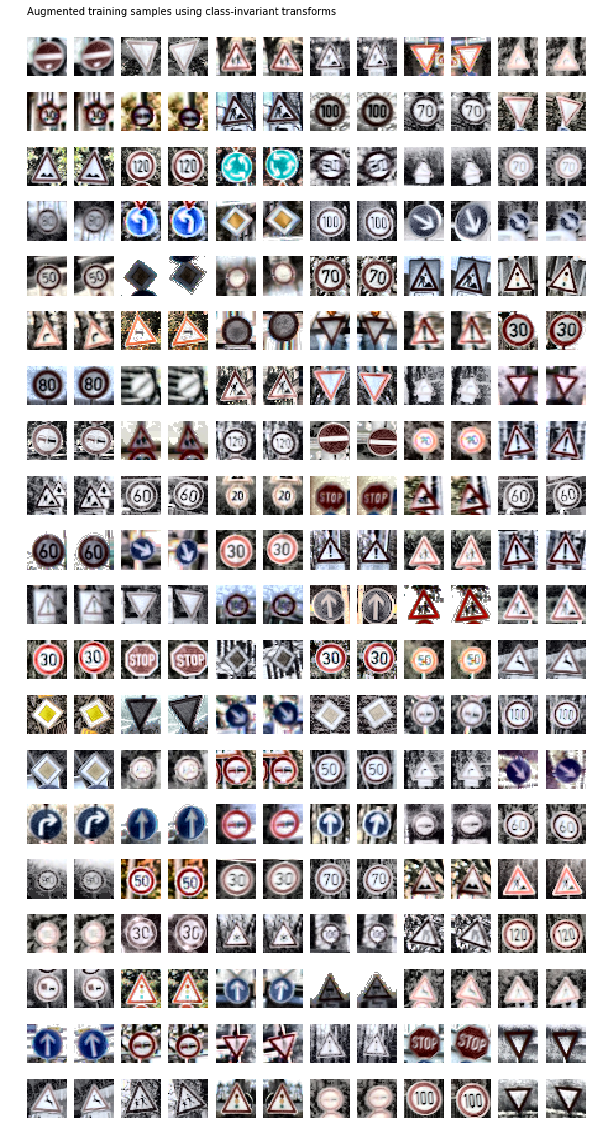

In [106]:
# show a few items and faked counterparts 
fig, axes = plt.subplots(20, 12, figsize=(10,20))
axes[0, 0].annotate("Normalized vs. Augmented training samples using class-invariant transforms", (0, 1), xytext=(0, 20),
                    textcoords='offset points', xycoords='axes fraction',
                    ha='left', va='bottom')
for i, ax in enumerate(axes.flat):
    ax.set_axis_off()
    if i % 2:
         ax.imshow(cv2.cvtColor(normalize(fake(X_train[index],y_train[index])), cv2.COLOR_YCrCb2RGB))
    else:
        index = np.random.randint(X_train.shape[0])
        ax.imshow(cv2.cvtColor(normalize(X_train[index]), cv2.COLOR_YCrCb2RGB))

plt.show()

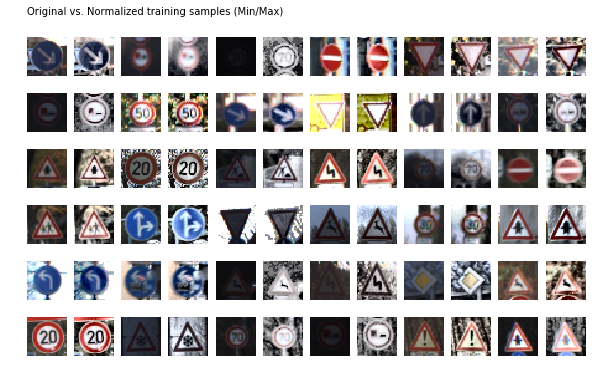

In [107]:
# show a few faked items and normalized counterparts

fig, axes = plt.subplots(6, 12, figsize=(10,6))
axes[0, 0].annotate("Original vs. Normalized training samples (Min/Max)", (0, 1), xytext=(0, 20),
                    textcoords='offset points', xycoords='axes fraction',
                    ha='left', va='bottom')
for i, ax in enumerate(axes.flat):
    ax.set_axis_off()
    if i % 2:
        ax.imshow(cv2.cvtColor(normalize(X_train[index]), cv2.COLOR_YCrCb2RGB))
    else:
        index = np.random.randint(X_train.shape[0])
        ax.imshow(X_train[index])

plt.show()

### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**

***RGB -> YUV Conversion***

I converted images from thr RGB colorspace to YUV. YUV is a form of YCrBr where one channel (Y) stores the brightness and the others (CrBr/UV) store color information. The rationale is that the model inputs are YUV channels instead of RGB. Conceptually a deep NN could figure out the best ideal transformation on its own (RGB->YUV can be done using  multiplication matrix - so this transform easily to a FC NN w/o activation) but feeding the NN with dimensions already rich in information (especially brightness) helps: a) making the network smaller, b) faster learning.

***Min-Max Scaling***

I decided to use Min-Max scaling on the brightness channel (Y) as a form of input normalization, where inputs are scaled from 0 to 255 (1 byte each, unsigned). I could have converted inputs from 0 <-> 255 to 0. <-> 1. (or -0.5 <-> 0.5) but since I am doing preprocessing in advance and keeping a normalized copy of the data in memory, it would have increased memory consumption significantly (each image now takes 32x32x3 = 3072 bytes, whereas if using float32 (4 bytes) it would have increased to 9216 bytes - assuming I kept all 3 channels). 

Implementation-wise other option would have been do build a TF pipeline and normalize on the fly as data is fed to the graph. Normalizing on the fly has the advantage of requiring less memory (you don't need to normalize everything in advance) and also may split workload between CPU and GPU (while the GPU is running the graph the CPU may run preprocessing upcoming data). I think those ideas are worth exploring performance-wise, and would probably be easier to maintain and less prone to errors (e.g. right now you have to explicitly normalize inputs before feeding it to TF, and the net will yield bad results silently if you feed non-normalized data).

Normalization is needed in a NN to help gradient descent learn all features at a similar rate (which is turn can be governed by the learning rate hyperparameter), and as long as the features we are trying to learn are normalization-invariant (i.e. scaling brightness does not change the label) we can and should apply it. Now that I think about this is why intuitively I decided not normalize the UV/CrBr channels, because once transformed to YUV scaling colors changes the color shift and could change the appearance of a signal.

***Contrast limited adaptative histogram equalization***

Instead of applying straight Min-Max scaling across all samples in one image, I used contrast limited adaptative histogram equalization on the brightness channel because in addition of scaling samples from 0 <-> 255 it does so across 4x4 tiles which helps in images that are very dark overall but have a few bright spots. See additional info [here](http://docs.opencv.org/3.1.0/d5/daf/tutorial_py_histogram_equalization.html). 


Bursts in training set: 1176
Bursts in validation set: 131
Classes in training set: 43
Classes in validation set: 43
Total items in augmented training set: 388080


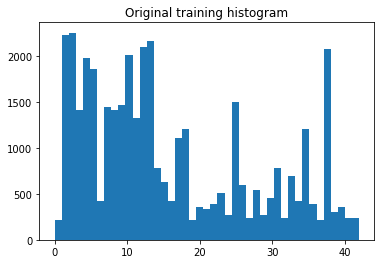

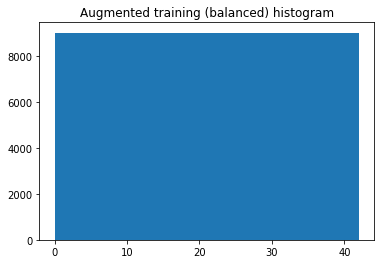

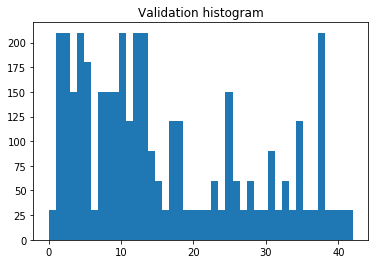

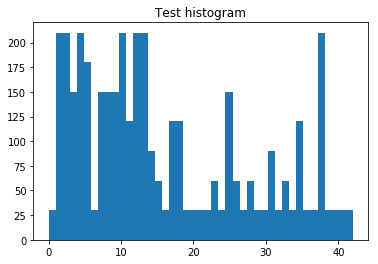

In [47]:
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

y_train_unique_bursts = y_train[::30]

X_train_burst_index, X_validate_burst_index, y_train_burst, y_validate_burst = \
    train_test_split(range(len(y_train_unique_bursts)), y_train_unique_bursts, \
    test_size=0.1, random_state=0, stratify=y_train_unique_bursts)

print("Bursts in training set:",    len(X_train_burst_index))
print("Bursts in validation set:",  len(X_validate_burst_index))
print("Classes in training set:",   len(set(y_train_burst)))
print("Classes in validation set:", len(set(y_validate_burst)))

assert( len(X_train_burst_index) ==  len(y_train_burst))

new_train_length    = len(X_train_burst_index) * 30 * ( 1 + fake_factor )

X_train_augmented = np.empty([new_train_length ,32,32,3], dtype=X_train_normalized.dtype)
y_train_augmented = np.empty([new_train_length]         , dtype=y_train.dtype)

X_validate        = np.empty([len(X_validate_burst_index) * 30,32,32,3],dtype=X_train_normalized.dtype)
y_validate        = np.empty([len(y_validate_burst) * 30]              ,dtype=y_train.dtype)

target_histogram    = np.empty([n_classes], dtype=int)
new_train_length_q  = new_train_length // n_classes
new_train_length_r  = new_train_length  % n_classes

target_histogram[:]                   = new_train_length_q
target_histogram[:new_train_length_r] = new_train_length_q + 1

assert(np.sum(target_histogram) == new_train_length)

targets = np.zeros([len(X_train_burst_index)], dtype=int)

# build an array of target images we need to generate at each index of the
# training set to achieve a fully balanced training set 
for c in set(y_train_burst):
    n_indexes = np.bincount(y_train_burst)[c]
    indexes = np.where(y_train_burst==c)[0]
    target_for_this_class = target_histogram[c] - n_indexes * 30
    assert(n_indexes == len(indexes))
    new_target_q = target_for_this_class // n_indexes
    new_target_r = target_for_this_class  % n_indexes
    assert(np.sum(targets[indexes]) == 0)
    targets[indexes]                = new_target_q 
    targets[indexes[:new_target_r]] = new_target_q + 1

ii=0
for j,(x_burst_index, y_burst) in enumerate(zip(X_train_burst_index, y_train_burst)):
    # first put the original images from the burst
    for i in range(30):
        X_train_augmented[ii] = X_train_normalized[x_burst_index*30+i]
        y_train_augmented[ii] = y_burst
        ii += 1
    # add up to 'target' images from this burst to achieve a balanced set
    # cycle through images in burst and apply a random class-invariant transformation to each one
    for f in range(targets[j]):
        X_train_augmented[ii] = normalize(fake(X_train[x_burst_index*30 + (f % 30)], y_burst))
        y_train_augmented[ii] = y_burst
        ii += 1
        
for j,(x_burst_index,y_burst) in enumerate(zip(X_validate_burst_index, y_validate_burst)):
    for i in range(30):
        X_validate[j*30+i] = X_train_normalized[x_burst_index*30+i]
        y_validate[j*30+i] = y_burst

print("Total items in augmented training set:", X_train_augmented.shape[0])
X_train_augmented, y_train_augmented = shuffle(X_train_augmented, y_train_augmented)

plt.title("Original training histogram")
plt.hist(y_train, bins=n_classes)  
plt.show()

plt.title("Augmented training (balanced) histogram")
plt.hist(y_train_augmented, bins=n_classes)    
plt.show()

plt.title("Validation histogram")
plt.hist(y_validate, bins=n_classes)    
plt.show()

plt.title("Test histogram (we should not have this!)")
plt.hist(y_test, bins=n_classes)    
plt.show()



# Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**

***Fixing the training set***

The training dataset is composed of bursts of images from the same video scene. Typically each video has 30 images and they are sequential in the sets.

However the size of the training set (39209) is not divisible by 30. There's one missing image at index 30*1122+29 (found by visual inspection). I added a missing sample at the right spot to make the training set bursts aligned each 30 images.

Knowing that each burst of 30 images belongs to the same video scene will help when picking the validation set. The rationale is that images from the same burst are too similar amongst themselves so if we blindly split the training set the validation set without accounting for this we will have images in the validation set too similar to the training set, and we want the validation set to be as close as possible as the test set (unseen images).

***Augmented data***

I decided to create additional copies of the data following the approach in the paper.

The reason of adding additional data is that there's classes with very few samples. E.g. class 1 only has 7*30 = 210 images, because I decided to include all images from the same burst to either training or validation (but not mixed) there's cases where training may only have ~180 images (6*30... because at a minimum validation will have 1 burst for each class) and we need more images for the neural network to learn effectively.

How can we augment data? We could generate training samples from scratch (e.g. synthetizing new signals and adding backgrounds, noise, camera effects, etc.) or use existing samples and apply class-invariant transformations that are also reallistically occuring in the sets.

I added the following:
* Rotating [-15,15] degrees with center of rotation [-2,2] of center of image and scaling it [0.95,1.05]. This is mentioned in the paper. 
* Changing the perspective of the image by taking a poligon whose vertex are 4px far apart (x,y) from each point of the normal bounding box (0,0) (32,0) (0,32) (32,32). This is not described in the paper but I noticed in the video tha the camera perspective changes so this processing roughly simulates that.

I noticed that both rotation and perspective warping are class-invariant by visual inspection with the parameters I chose. There's a risk of applying a transformation that effectively destroys class information (e.g. a very small image that is further zoomed out so the defining feautures are lost). One could run a second phase of the neural network, compute confidence of predicted classes for the augmented items and select a new augmented set so that only tested class-invariant augmented samples are effectively used.

At the end I created ~20X more faked images for training. I tested multiple augmentation factors and I ended up with 20X as it yielded good results (the paper used 5X more samples).

***Training, Validation and testing***

I performed *a lot* of experiments to arrive to my current implementation and learned a lot in the process. Initially I started with a vanilla LeNet-5 and initially achieved ~90% test accuracy vs. ~95% validation accuracy. I watched [Andrew Ng video](https://www.youtube.com/watch?v=F1ka6a13S9I) where he describes what to do then the difference between test and validation accuracy is high: add more data or deepen your network. 

It took me a while to realize that I was including similar images to the training data (belonging to same video sequence). At that point I implemented the 30 image video burst splitting which makes sure bursts are included in either the training set or the validation set, and that there are no images mixed in the validation and training sets that belong to the same burst.

After creating 20X more examples I split the data as follows:

* *Test set* untouched (normalized)
* *Validation set* consists of 10% of the original (non-augmented) training examples all belonging to the same bursts.
* *Training set* consists of 90% of the original (non-augmented) training examples plus 20X new faked samples (generated by perspective warping and rotating of original samples). The training set does not contain any image (original or augmented) that belongs to any burst present in the validation set.

Note: ideally we'd like to have the validation set as close as possible to the test set. I did not include any faked images in the validation set because I think it increases the chances of having bigger difference betwen test and validation accuracy. In the same vein, I picked the validation set with the same classes distribution as the training set (and hence the test set) by using (stratify) in the *test_train_split* function.

***Balanced vs. unbalanced sets***

The training set is very unbalanced. I will perform further experiments to balance it. Now that I have augmentation primitives it would be trivial to augment the training set to a given size by augmenting some class more/less than others so the training set is balanced.

In [13]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

import tensorflow as tf

EPOCHS = 100

from tensorflow.contrib.layers import flatten
tf.reset_default_graph()

def SermanetInspired10(x):    
    
    #  Stage 1: 
    #
    #        2d conv 
    #   Y => 32x32xY_features  ->                             
    #                          -> ReLU 32x32xS1_features -> 2:1 Pool 16x16xS1_features=> (S1)
    #  UV => 32x32xUV_features -> 
    
    Y_features  = 100
    UV_features = 8
    S1_features = Y_features + UV_features
    (x_y,x_u,x_v) = tf.split(3,3,x)
    x_uv = tf.concat(3,[x_u,x_v])

    L1Y_W = tf.get_variable("L1Y_W", shape=[5, 5, 1, Y_features], initializer=tf.contrib.layers.xavier_initializer())
    L1Y_b = tf.Variable(tf.zeros(Y_features), name = "L1Y_b")
    L1Y = tf.nn.bias_add(tf.nn.conv2d(x_y, L1Y_W, [1,1,1,1], 'VALID'), L1Y_b)
    L1UV_W = tf.get_variable("L1UV_W", shape=[5, 5, 2, UV_features], initializer=tf.contrib.layers.xavier_initializer())
    L1UV_b = tf.Variable(tf.zeros(UV_features), name = "L1UV_b")
    L1UV = tf.nn.bias_add(tf.nn.conv2d(x_uv, L1UV_W, [1,1,1,1], 'VALID'), L1UV_b)
    L1a = tf.concat(3,[L1Y,L1UV])
    L1b = tf.nn.dropout(tf.nn.relu(L1a), keep_prob[3])

    # Pooling. Input = 28x28xS1_features. Output = 14x14xS1_features.
    L1c = tf.nn.max_pool(L1b, [1,2,2,1], [1,2,2,1], 'SAME')
    print("L1 after pooling (input to L2): ", L1b.get_shape())

    # Pooling. Input = 14x14xS1_features. Output = 7x7xS1_features (for FC layers)
    L1cpf = flatten(tf.nn.max_pool(L1c, [1,2,2,1], [1,2,2,1], 'SAME'))
    print("L1 after pooling and flattening (input to FC): ", L1cpf.get_shape())

    #  Stage 2: 
    #
    #         2d conv                        
    #  S1 => 14x14xS2_features -> ReLU 10x10xS2_features -> 2:1 Pool 8x8xS2_features=> (S2)
    #
 
    S2_features = 100
    L2a_W = tf.get_variable("L2_W", shape=[5, 5, S1_features, S2_features], initializer=tf.contrib.layers.xavier_initializer())
    L2a_b = tf.Variable(tf.zeros(S2_features), name = "L2_b")
    L2a =  tf.nn.bias_add(tf.nn.conv2d(L1c, L2a_W, [1,1,1,1], 'VALID'), L2a_b)
    L2b = tf.nn.dropout(tf.nn.relu(L2a), keep_prob[2])
    
    # Pooling. Input = 10x10xS2_features. Output = 5x5xS2_features.
    L2c = tf.nn.max_pool(L2b, [1,2,2,1], [1,2,2,1], 'SAME')

    # Pooling. Input = 8x8xS2_features. Output = 4x4xS2_features (for FC layers)
    L2cpf = flatten(L2c)
    print("L2 after pooling and flattening (input to FC): ", L2cpf.get_shape())
    
    # Stage 3: TODO if needed 
    # Input 5x5xS2_features Output 1x1xS3_features
    
    S3_features = 200
    L3a_W = tf.get_variable("L3_W", shape=[5, 5, S2_features, S3_features], initializer=tf.contrib.layers.xavier_initializer())
    L3a_b = tf.Variable(tf.zeros(S3_features), name = "L3_b")
    L3a =  tf.nn.bias_add(tf.nn.conv2d(L2c, L3a_W, [1,1,1,1], 'VALID'), L3a_b)
    L3b = tf.nn.dropout(tf.nn.relu(L3a), keep_prob[1])
    L3bp = flatten(L3b)

    # Stage 4: Fully Connected w/ DROPOUT followed by Logits

    S4_features = 1024
    L4_W = tf.get_variable(name="L4_W",shape=[S3_features+5*5*S2_features +7*7*S1_features, S4_features], initializer=tf.contrib.layers.xavier_initializer())
    L4_b = tf.Variable(tf.zeros(S4_features), name = "L4_b")
    L4 =  tf.nn.dropout(tf.nn.relu( tf.nn.bias_add(tf.matmul(tf.concat(1,[L3bp,L2cpf,L1cpf]), L4_W),L4_b)), keep_prob[0])

    # Layer 5: Fully Connected. Output = n_classes.
    L5_W = tf.get_variable(name="L5_W",shape=[S4_features, n_classes], initializer=tf.contrib.layers.xavier_initializer())
    L5_b = tf.Variable(tf.zeros(n_classes), name="L5_b")
    logits =  tf.nn.bias_add(tf.matmul(L4, L5_W), L5_b)
    
    return logits



In [14]:
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
keep_prob = tf.placeholder(tf.float32,4)

one_hot_y = tf.one_hot(y, n_classes)

rate = 0.001

logits = SermanetInspired10(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
trainable_variables   = tf.trainable_variables() 
# user L2 regularization for weights only in all layers
lossL2 = tf.add_n([ tf.nn.l2_loss(v) for v in trainable_variables if 'L4_W' in v.name ]) * 0.001
loss_operation = tf.reduce_mean(cross_entropy + lossL2)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

L1 after pooling (input to L2):  (?, 28, 28, 100)
L1 after pooling and flattening (input to FC):  (?, 4900)
L2 after pooling and flattening (input to FC):  (?, 2500)


In [15]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

BATCH_SIZE = 1024

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: [1.0,1.0,1.0,1.0]})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

# from http://stackoverflow.com/questions/38160940/how-to-count-total-number-of-trainable-parameters-in-a-tensorflow-model
def count_number_trainable_params():
    '''
    Counts the number of trainable variables.
    '''
    tot_nb_params = 0
    for trainable_variable in tf.trainable_variables():
        shape = trainable_variable.get_shape() # e.g [D,F] or [W,H,C]
        current_nb_params = get_nb_params_shape(shape)
        tot_nb_params = tot_nb_params + current_nb_params
    return tot_nb_params

def get_nb_params_shape(shape):
    '''
    Computes the total number of params for a given shap.
    Works for any number of shapes etc [D,F] or [W,H,C] computes D*F and W*H*C.
    '''
    nb_params = 1
    for dim in shape:
        nb_params = nb_params*int(dim)
    return nb_params 


### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

I attempted to follow the paper as much as I could, here's the result:

![Architecture](./Sermanet.png)

I tried various other topologies, especially a bigger FC at the bottom which gives goods results but I wanted to stick to the paper. I also tried different padding for the convolutional filters but I left what I believe was used in the paper (zero-padding on conv. nets, 'SAME' in TF). 

In retrospect I don't think this is a good idea in this case as it adds some overhead (and you could use the extra power in a bigger net at the bottom or deeper depth at the second stage.

In [21]:
### Train your model here.
### Feel free to use as many code cells as needed.
from time import time

# so few hyperparams that we set up grid search
for BATCH_SIZE in [1024]:
    for (L4_dropout, L3_dropout, L2_dropout, L1_dropout) in [(50,40,30,10)]:
        with tf.Session() as sess:
            sess.run(tf.global_variables_initializer())
            num_examples = len(X_train_augmented)

            print()
            print("Training: dropout L4={:d}% L3={:d}% L2={:d}% L1={:d}%, batch size = {:d}. Initial validation accuracy: {:4.2f}%".format(\
                L4_dropout, L3_dropout ,L2_dropout,L1_dropout, \
                BATCH_SIZE,100. * evaluate(X_validate, y_validate)))        
            print("Trainable params: {:d}".format(count_number_trainable_params()))
            print("-------------------+-------------------+-------------------+-------------------+")
            max_validation_accuracy = 0.
            decreasing_accuracy_epochs = 0

            first_epoch = last_epoch = time()

            for i in range(EPOCHS):
                X_train_augmented, y_train_augmented = shuffle(X_train_augmented, y_train_augmented)
                training_loss = 0
                for offset in range(0, num_examples, BATCH_SIZE):
                    end = offset + BATCH_SIZE
                    batch_x, batch_y = X_train_augmented[offset:end], y_train_augmented[offset:end]
                    k_prob = 1. - np.array([L4_dropout,L3_dropout,L2_dropout,L1_dropout]) / 100.
                    _, loss = sess.run([training_operation, loss_operation], feed_dict={x: batch_x, y: batch_y, keep_prob: k_prob})
                    training_loss += loss 
                   
                training_loss /= num_examples
                validation_accuracy = evaluate(X_validate, y_validate)

                if validation_accuracy > max_validation_accuracy:
                    max_validation_accuracy = validation_accuracy
                    decreasing_accuracy_epochs = 0
                    saver.save(sess, 'sermanet10')
                else:
                    decreasing_accuracy_epochs += 1

                current_time = time()
                epoch_time = current_time - last_epoch
                last_epoch = current_time

                print(" {:2d}: {:4.1f}%{} {:6.6f} ({:3.0f}s) |".format(\
                    i,
                    validation_accuracy * 100,
                    '*' if decreasing_accuracy_epochs == 0 else ' ' , 
                    training_loss * 100,
                    epoch_time),end="")
                
                if ((i+1) % 4) == 0 :
                    print()
                if (validation_accuracy >= 0.999) | (decreasing_accuracy_epochs >= 30):
                    break    

            if ((i+1) % 4) != 0 :
                print()
            print("Training took {:.0f} seconds. Max validation accuracy = {:4.2f}%".format(last_epoch - first_epoch ,100. * max_validation_accuracy ))

        with tf.Session() as sess:
            saver.restore(sess, tf.train.latest_checkpoint('.'))

            test_accuracy = evaluate(X_test_normalized, y_test)
            print("Test Accuracy = {:4.2f}%".format(100. * test_accuracy))
            print()
        


Training: dropout L4=50% L3=40% L2=30% L1=10%, batch size = 1024. Initial validation accuracy: 0.53%
Trainable params: 8580807
-------------------+-------------------+-------------------+-------------------+
  0: 94.9%* 98.1% 0.0039 ( 74s) |  1: 96.7%* 99.1% 0.0007 ( 74s) |  2: 97.6%* 99.4% 0.0005 ( 74s) |  3: 96.6%  99.6% 0.0004 ( 73s) |
  4: 97.0%  99.6% 0.0004 ( 73s) |  5: 97.6%  99.7% 0.0003 ( 73s) |  6: 98.4%* 99.6% 0.0003 ( 74s) |  7: 97.3%  99.7% 0.0003 ( 73s) |
  8: 97.7%  99.7% 0.0002 ( 73s) |  9: 98.1%  99.8% 0.0002 ( 73s) | 10: 98.3%  99.8% 0.0002 ( 73s) | 11: 97.5%  99.8% 0.0002 ( 73s) |
 12: 98.5%* 99.8% 0.0002 ( 74s) | 13: 98.2%  99.8% 0.0002 ( 73s) | 14: 97.7%  99.9% 0.0002 ( 73s) | 15: 98.2%  99.9% 0.0002 ( 73s) |
 16: 98.2%  99.9% 0.0001 ( 73s) | 17: 97.9%  99.9% 0.0001 ( 73s) | 18: 97.7%  99.7% 0.0001 ( 73s) | 19: 97.6%  99.8% 0.0001 ( 73s) |
 20: 98.1%  99.9% 0.0001 ( 73s) | 21: 98.0%  99.9% 0.0001 ( 73s) | 22: 98.4%  99.9% 0.0001 ( 73s) | 23: 98.1%  99.9% 0.0001 ( 

KeyboardInterrupt: 

In [22]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    
    test_accuracy = evaluate(X_test_normalized, y_test)
    print("Test Accuracy = {:4.2f}%".format(100. * test_accuracy))

Test Accuracy = 97.55%


### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**

I used Adam optimization for minimal tuning of the learning rate and introducing less hyperparameters. I tried various learning rates but found 0.001 to work fine.

I ran more than 60 combinations of models, hyperparameters and training. 
I documented all in [this Google spreadsheet](https://docs.google.com/spreadsheets/d/1CWx-MA_36FrpILSZ-S15gJctL4EiGj-b7T3TVwkR6bY/edit#gid=0).

The training cycle stops at 100 epochs or if there's M epochs with decreasing validation accuracy (M was 5 for short test and 15 for longer ones).

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**

My goal was to replicate the results of the paper inasmuch as possible. I managed to get 95% accuracy in the test set using a similar number of trainable parameters (1,681,559) as in the paper and no dropout. Using dropout and more complex network (1024 FC layers just before the logits instead of 100) I got 97.4% test accuracy.

The order was:
- LeNet-5 w/o augmentation
- Various inspirations of the net in the paper Sermanet (referred here as "SermanetX"): initially I set the final FC layers too big and produced great results on the test set but I was concerned at the difference between test and validation accuracy.
- Continued with data augmentation: added rotation and  warping.
- Debugging until I noticed the validation set had images related to the training set. Implemented train/validation split accouting for this.
- Small grid search for hyperparameters, especially dropout and batch size (tried to maximize for speed).



---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

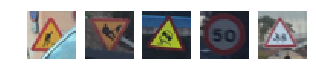

In [95]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

import glob
import matplotlib.image as mpimg
import scipy.ndimage

fig, axes = plt.subplots(1,5, figsize=(5, 1))

new_labels = [25, 25, 23,2, 28]
new_images = np.empty((len(new_labels)+38+5,32,32,3), dtype=np.uint8)

ii=0
for i, img in enumerate(glob.glob('./traffic-*.png')):
    image = scipy.ndimage.imread(img)
    axes[i].axis('off')
    axes[i].imshow(image)
    new_images[ii]=image[:,:,:3]
    ii +=1
    
for i, img in enumerate(glob.glob('./signs/sign*.png')):
    image = scipy.ndimage.imread(img)
    image = cv2.resize(image,(32,32))
    new_images[ii] = image[:,:,0:3]
    ii +=1

for i, img in enumerate(glob.glob('./signs/example*.png')):
    new_images[ii] = scipy.ndimage.imread(img)[:,:,0:3]
    ii +=1

    

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**

I chose the images above:

1. (25 - construction work) is partially occluded.
2. (25 - construction work) tipped down. I've built some rotation invariance into my model so I am curious as to how it will perform.
3. (23 - sloppy road) has yellow background so it should not be very difficult.
4. (2  - 50km.h speeed limit) should be easy.
5. (28 - children crossing) is blurry.

In [96]:
### Run the predictions here.
### Feel free to use as many code cells as needed.
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    new_images_accuracy = evaluate(normalize(new_images[:len(new_labels)]), new_labels)
    print("Test Accuracy = {:4.2f}%".format(100. * new_images_accuracy))

Test Accuracy = 20.00%


### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**

No. It was a disaster. I still don't understand why the dismal performance!


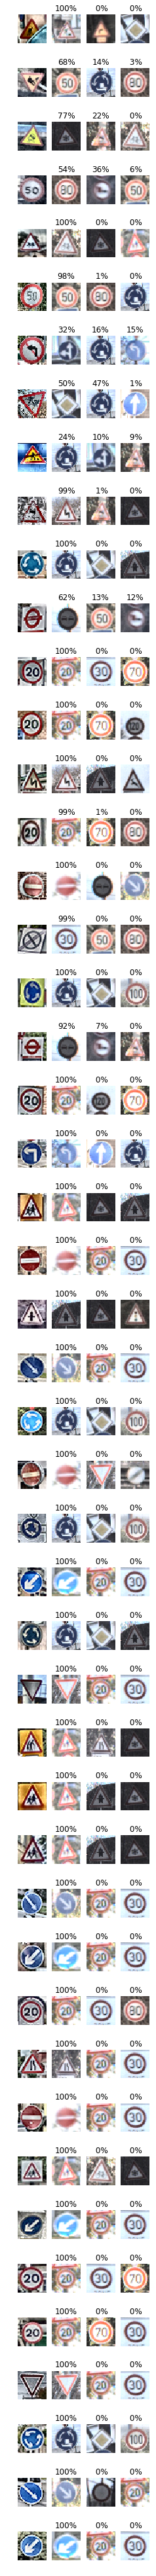

In [97]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.

LOGITS = 3
softmax_logits = tf.nn.softmax(logits)
top_k = tf.nn.top_k(softmax_logits, k=LOGITS)

n_images = new_images.shape[0]

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    my_softmax_logits = sess.run(softmax_logits, feed_dict={x: normalize(new_images), keep_prob: [1.,1.,1.,1.]})
    my_top_k = sess.run(top_k, feed_dict={x: normalize(new_images), keep_prob: [1.,1.,1.,1.]})
    
    top_values, top_indices = my_top_k
    
    fig, axes = plt.subplots(n_images, LOGITS+1, figsize=(LOGITS*1.2, 1.5*n_images))
    for i, row in enumerate(axes):
        row[0].axis('off')
        row[0].imshow(cv2.cvtColor(normalize(new_images[i]), cv2.COLOR_YCrCb2RGB))
        for j in range(LOGITS):
            row[1+j].axis('off')
            row[1+j].imshow(cv2.cvtColor(X_train_normalized[classes_index[top_indices[i,j]][0]],  cv2.COLOR_YCrCb2RGB))
            row[1+j].set_title("{:2.0f}%".format(top_values[i,j]*100.0))
            

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**

- Identified the partially occluded sign (25) as priority road (12) with 100% probability. Something is not right.
- Identified the tipped down sign (25) as Yield with 10% probability.
- Identified the sloppy road sign (23) as Right-of-way at the next intersection with 9.7% probability.
- Identified the 50 Km/h sign (2) as 80 Km/h (5) with 81% and as the right one with 18%. The numbers are similar so this is a resolution issue? 
- Identified the school crossing (28) correctly with 65% certainty.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.